In [1]:
!kaggle datasets download -d ivansher/nasa-nearest-earth-objects-1910-2024
!unzip nasa-nearest-earth-objects-1910-2024.zip

Dataset URL: https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024
License(s): CC0-1.0
nasa-nearest-earth-objects-1910-2024.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  nasa-nearest-earth-objects-1910-2024.zip
replace nearest-earth-objects(1910-2024).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [3]:
df = pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [4]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
df['orbiting_body'].value_counts()

,count
orbiting_body,
Earth,338199


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [9]:
def fill_null_value(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0], inplace=True)
    else:
      df[col].fillna(df[col].median(), inplace=True)

  return df

In [10]:
df = fill_null_value(df)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338199 non-null  float64
 3   estimated_diameter_min  338199 non-null  float64
 4   estimated_diameter_max  338199 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [12]:
df.drop(['neo_id','name','orbiting_body'], axis=1, inplace=True)

In [13]:
df.isnull().sum()

,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [14]:
numerical_col = [i for i in df.columns if df[i].dtypes == 'float64']

In [15]:
numerical_col

['absolute_magnitude',
 'estimated_diameter_min',
 'estimated_diameter_max',
 'relative_velocity',
 'miss_distance']

In [16]:
import seaborn as sns

<ipython-input-17-e51313d9936d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-17-e51313d9936d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-17-e51313d9936d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

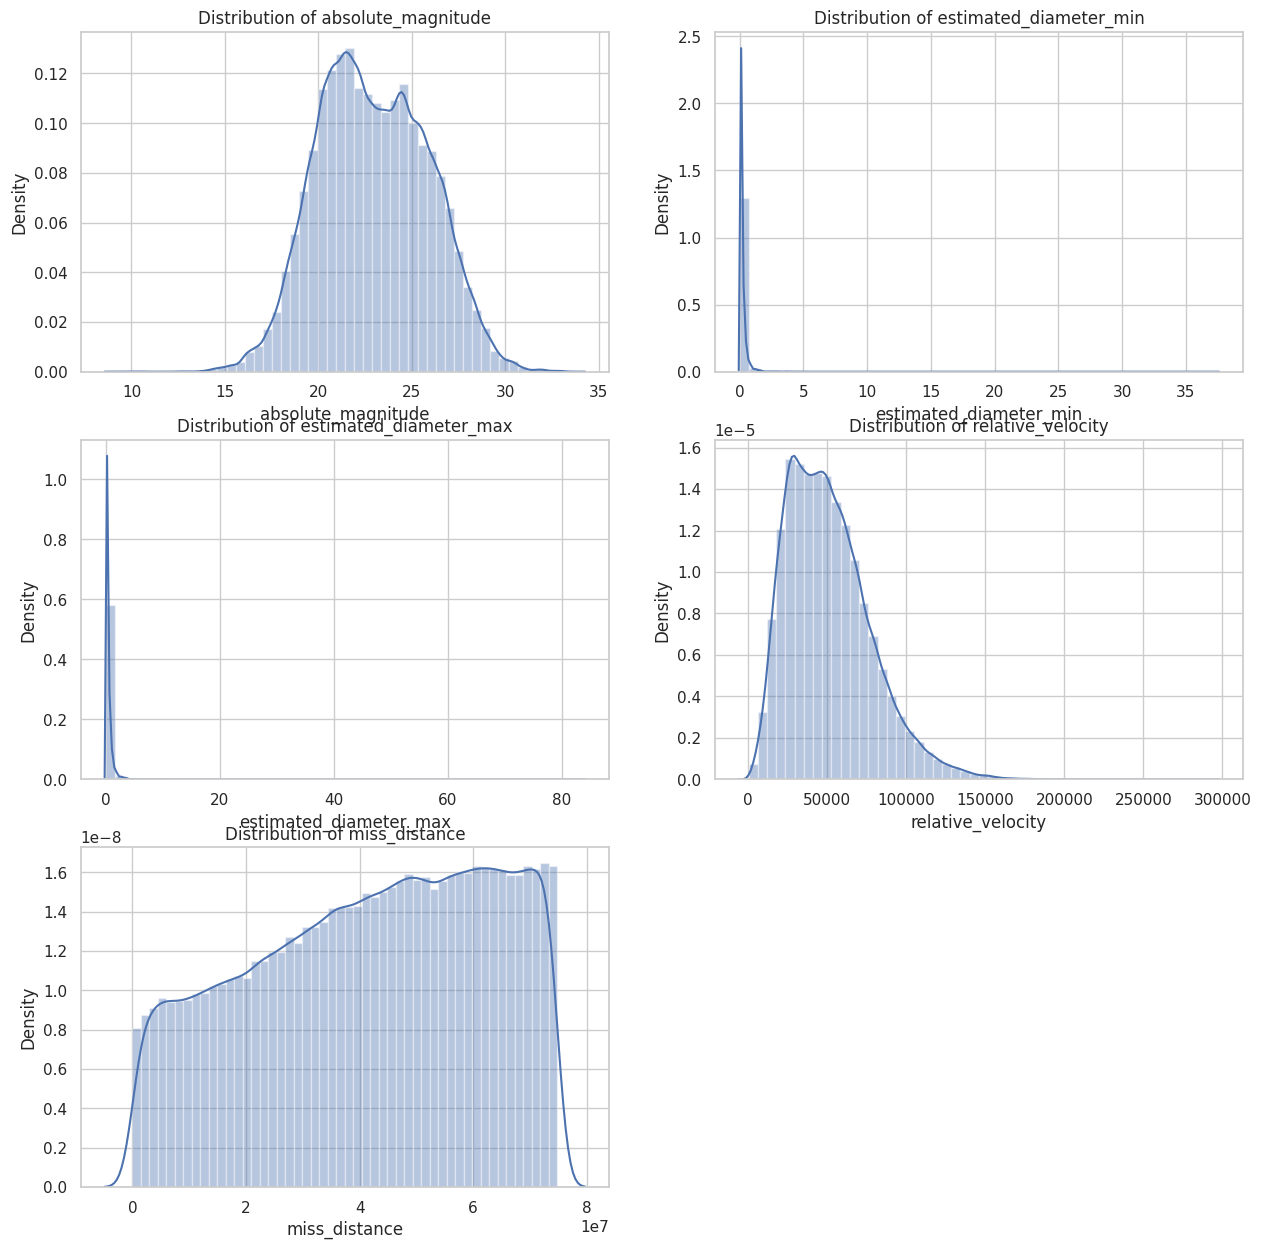

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_col):
    plt.subplot(3, 2, i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
plt.show()

<ipython-input-18-d98a0ad59f87>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_hazardous', data=df, ax=ax2, palette=palette)
<ipython-input-18-d98a0ad59f87>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df["is_hazardous"].unique())


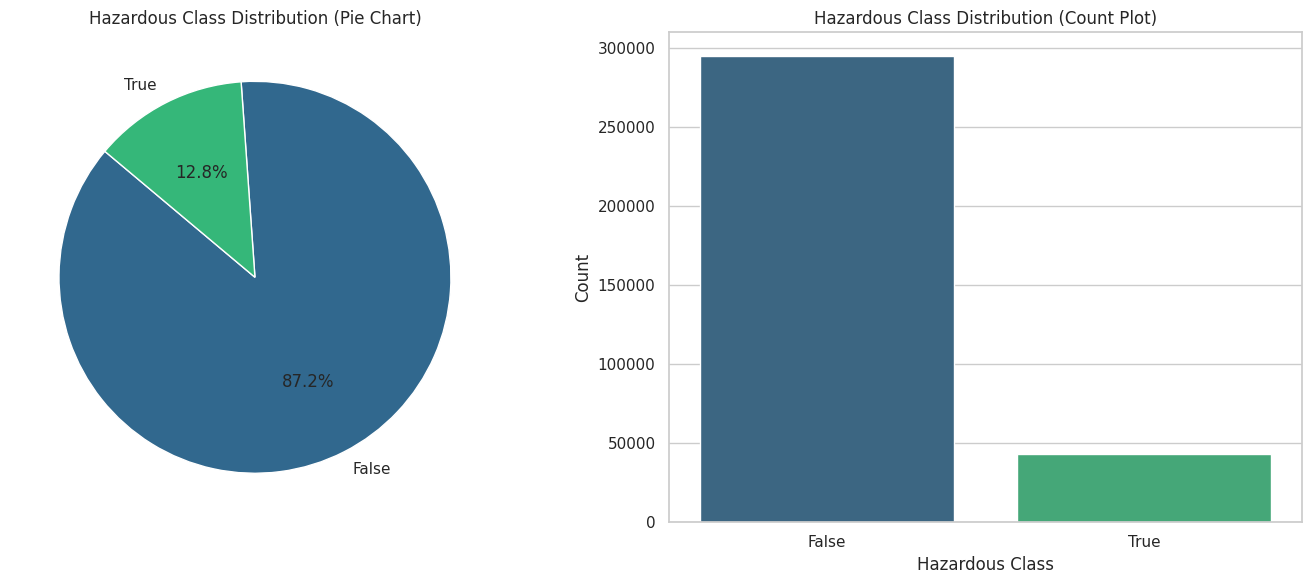

In [18]:
hazardous_counts = df['is_hazardous'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(hazardous_counts))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(hazardous_counts, labels=df["is_hazardous"].unique(), autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Hazardous Class Distribution (Pie Chart)')
sns.countplot(x='is_hazardous', data=df, ax=ax2, palette=palette)
ax2.set_title('Hazardous Class Distribution (Count Plot)')
ax2.set_xlabel('Hazardous Class')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df["is_hazardous"].unique())
plt.tight_layout()
plt.show()

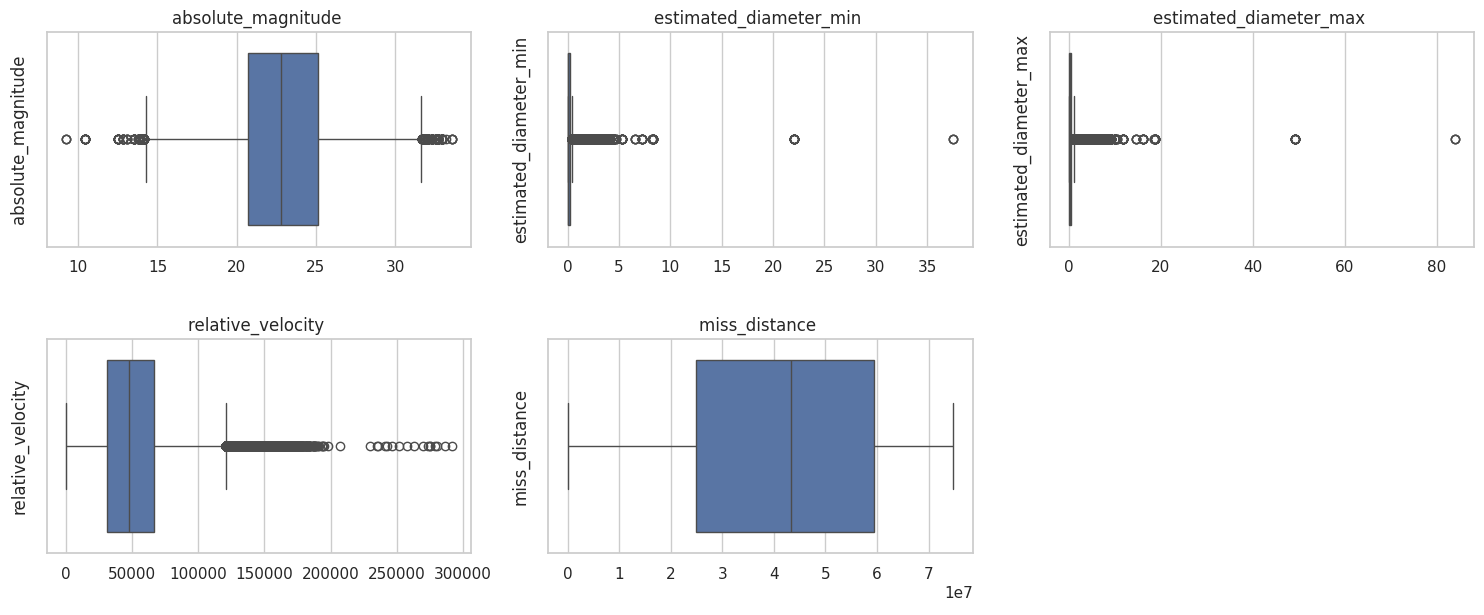

In [19]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

In [20]:
def remove_outliers(feature):
    global df
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.65)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    df = df.loc[(df[feature] < upper_limit) & (df[feature] > lower_limit)]

In [21]:
features_list = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", "relative_velocity"]

for feature in features_list:
    remove_outliers(feature)

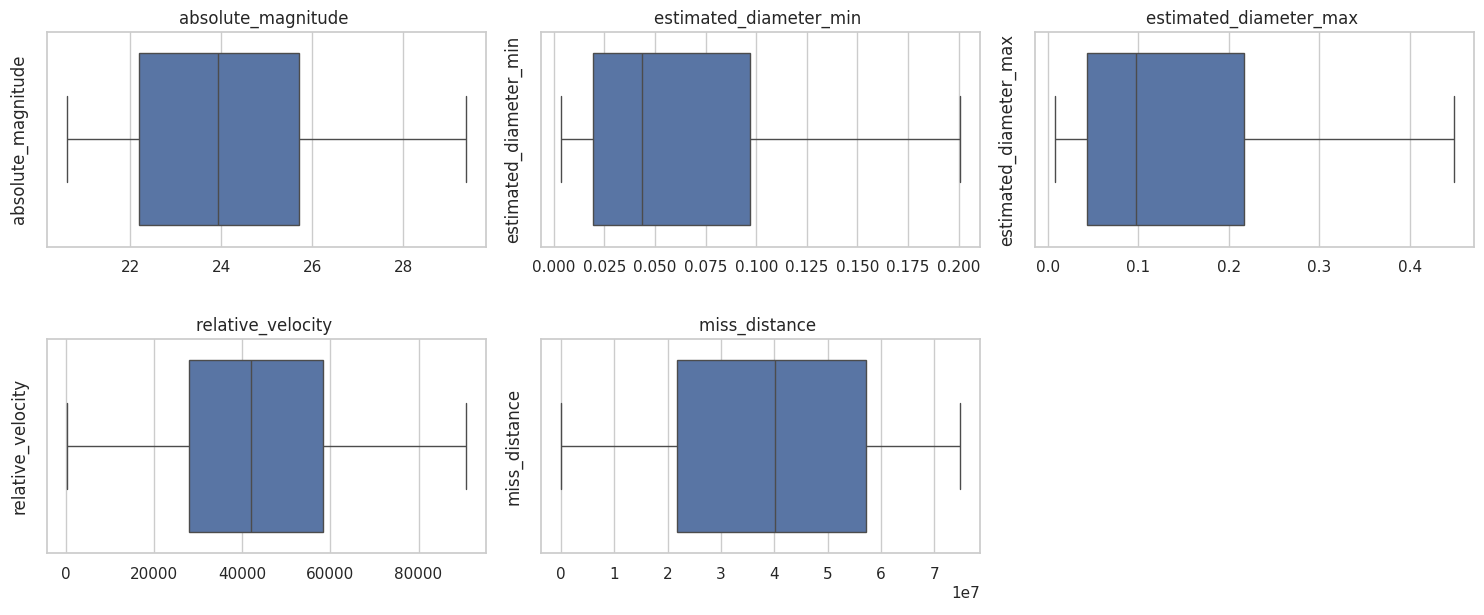

In [22]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244480 entries, 2 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      244480 non-null  float64
 1   estimated_diameter_min  244480 non-null  float64
 2   estimated_diameter_max  244480 non-null  float64
 3   relative_velocity       244480 non-null  float64
 4   miss_distance           244480 non-null  float64
 5   is_hazardous            244480 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 11.4 MB


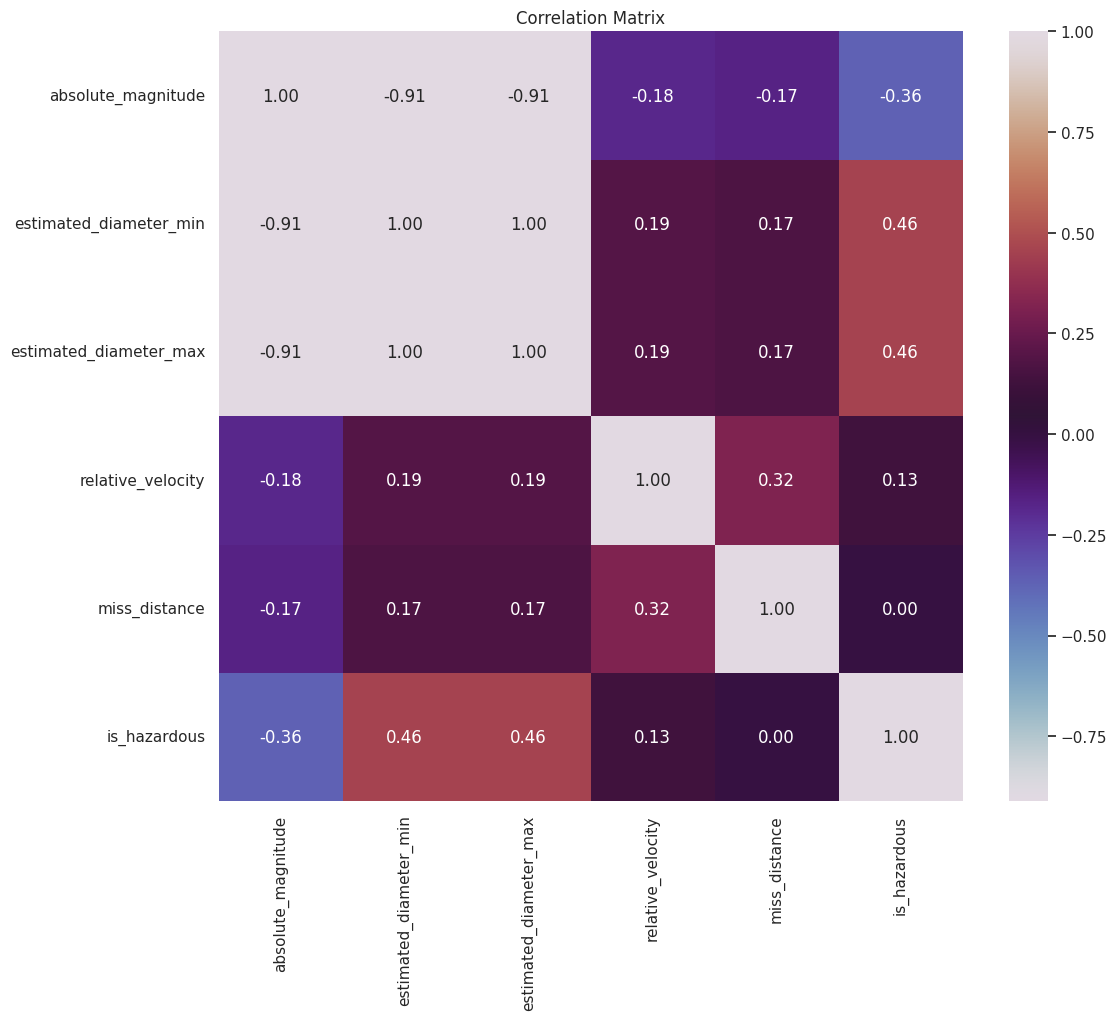

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='twilight', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [25]:
X = df.drop(["is_hazardous"], axis=1)

y = df["is_hazardous"]

In [26]:
somte = SMOTE(random_state=42)

X, y = somte.fit_resample(X, y)

y.value_counts()

,count
is_hazardous,
False,225505
True,225505


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((360808, 5), (360808,), (90202, 5), (90202,))

In [28]:
clf = RandomForestClassifier(random_state=42)

In [29]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = clf.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97     45101
        True       0.97      0.97      0.97     45101

    accuracy                           0.97     90202
   macro avg       0.97      0.97      0.97     90202
weighted avg       0.97      0.97      0.97     90202



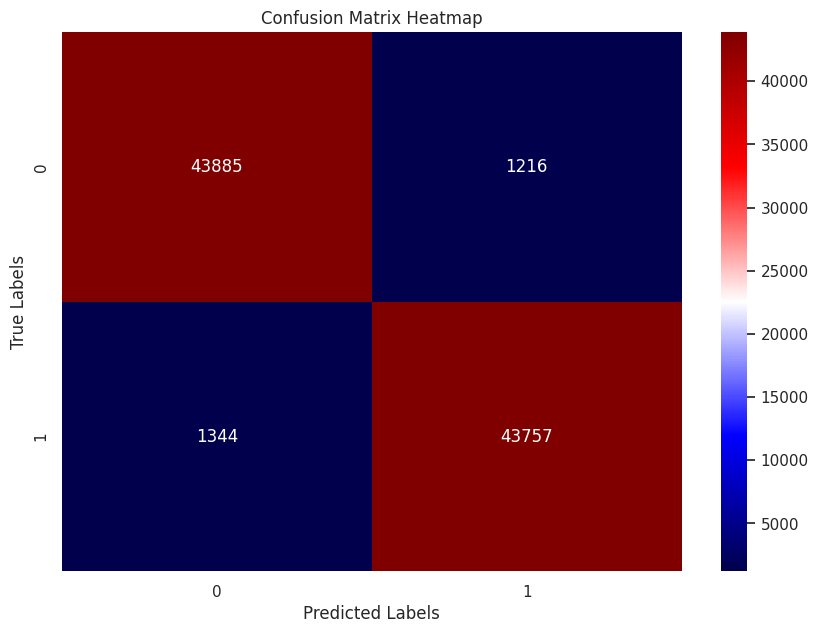

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='seismic')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [33]:
import pickle

filename = 'Hazardous'
pickle.dump(clf, open(filename, 'wb'))



In [34]:
loaded_model = pickle.load(open(filename, 'rb'))

y_pred = loaded_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9716192545619831


In [35]:

!pip install gradio

import gradio as gr

In [36]:

def predict_hazardous(absolute_magnitude, estimated_diameter_min, estimated_diameter_max, relative_velocity, miss_distance):
    """
    Predicts whether an asteroid is hazardous based on input features.
    """
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({
        'absolute_magnitude': [absolute_magnitude],
        'estimated_diameter_min': [estimated_diameter_min],
        'estimated_diameter_max': [estimated_diameter_max],
        'relative_velocity': [relative_velocity],
        'miss_distance': [miss_distance]
    })

    # Make the prediction
    prediction = loaded_model.predict(input_data)[0]

    # Return the prediction
    return "Hazardous" if prediction == 1 else "Not Hazardous"

# Create the Gradio interface using the updated syntax
inputs = [
    gr.Number(label="Absolute Magnitude"),
    gr.Number(label="Estimated Diameter Min"),
    gr.Number(label="Estimated Diameter Max"),
    gr.Number(label="Relative Velocity"),
    gr.Number(label="Miss Distance"),
]

output = gr.Textbox(label="Prediction")

iface = gr.Interface(
    fn=predict_hazardous,
    inputs=inputs,
    outputs=output,
    title="Asteroid Hazard Prediction",
    description="Predict if an asteroid is hazardous based on its characteristics."
)

# Launch the interface
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://89e615ce1f237889e6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
